In [400]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import sparse
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['xtick.labelsize']=30
plt.rcParams['ytick.labelsize']=30

In [401]:
UniqueFileIndex = np.load("UniqueRows.npy")
Features = np.load("FileCompoundFeatures.npy")
Features =Features[UniqueFileIndex,:]
MegaLabel = np.load("MegaLabelExtra.npy")#np.load("MegaMegaLabel.npy")
UniqueList = np.load("UniqueList.npy",allow_pickle = True)
ColumnNames = np.load("ColumnNames.npy", allow_pickle = True)
MegaLabel = MegaLabel[UniqueFileIndex,:]
StandardMegaLabel = np.load("StandardMegaLabel.npy")
StandardMegaLabel = StandardMegaLabel[UniqueFileIndex,:]

In [402]:
a = np.unique(MegaLabel[:,9],return_index = True)
MegaLabel = MegaLabel[a[1],:]
Features = Features[a[1],:]
StandardMegaLabel = StandardMegaLabel[a[1],:]

In [403]:
i = np.where(MegaLabel[:,1]!= 100)[0]
Features = Features[i,:]
MegaLabel = MegaLabel[i,:]

In [404]:
index = np.where((MegaLabel[:,6] ==501) * (MegaLabel[:,8] != 1234) )[0]
temp =  (MegaLabel[:,2]==10) + (MegaLabel[:,2]==11) +  (MegaLabel[:,2]==12) +  (MegaLabel[:,2]==13)
MegaLabel[:,2] = MegaLabel[:,2] * (~temp) +  temp *100
total = index.shape[0]
begin = int(total * .75)
permute = np.random.permutation(total)
#clf = LogisticRegression(random_state=0, penalty = 'l1', C = .1,class_weight = "balanced").fit(Features[index[permute[0:begin]],:], MegaLabel[index[permute[0:begin]],2])

In [405]:
Labels = [ "Crohn's disease", 'Kawasaki disease',
         'dental caries', 'diabetes mellitus',
       'disease NOS', 'hypertension', 'inflammatory bowel disease',
       'ischemic stroke','obesity',
       'primary bacterial infectious disease', 
       'sleep deprivation', 'ulcerative colitis','healthy']
Lebels = np.zeros(101).tolist()
temp = np.unique(MegaLabel[index,2]).astype('int').tolist()
for k in range(0,13):
    Lebels[temp[k]] = Labels[k]

In [406]:
ConfusionMatrixTotal = np.zeros((101,101))

In [407]:
Recording = []

In [408]:
locations = np.where(np.sort(np.bincount(MegaLabel[index,8].astype('int')))[::-1]!=0)[0]
bodypart = np.argsort(np.bincount(MegaLabel[index,8].astype('int')))[::-1][locations]

In [409]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [410]:
place = np.argsort(np.bincount(MegaLabel[index,8].astype('int')))[::-1]

In [411]:
from sklearn.model_selection import cross_val_score

In [412]:
data = []
labels = []
b = []

14
[[ 26   0   0   0  11   0]
 [  0  12   0   0   0   3]
 [  0   0   4   0   0   1]
 [  0   0   0  12   0   0]
 [ 29   0   0   0   5   0]
 [  1   8   0   5   2 900]]
[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]
feces
7
[[ 0  0  2]
 [ 0 86  0]
 [ 0  9 19]]
blood plasma
31
[[ 8  0  0]
 [ 0 53  0]
 [ 2 20  6]]
saliva
42
[[ 9  0  0  1]
 [ 0  6  0  0]
 [ 0  0 10  0]
 [ 7  0  0 42]]
urine


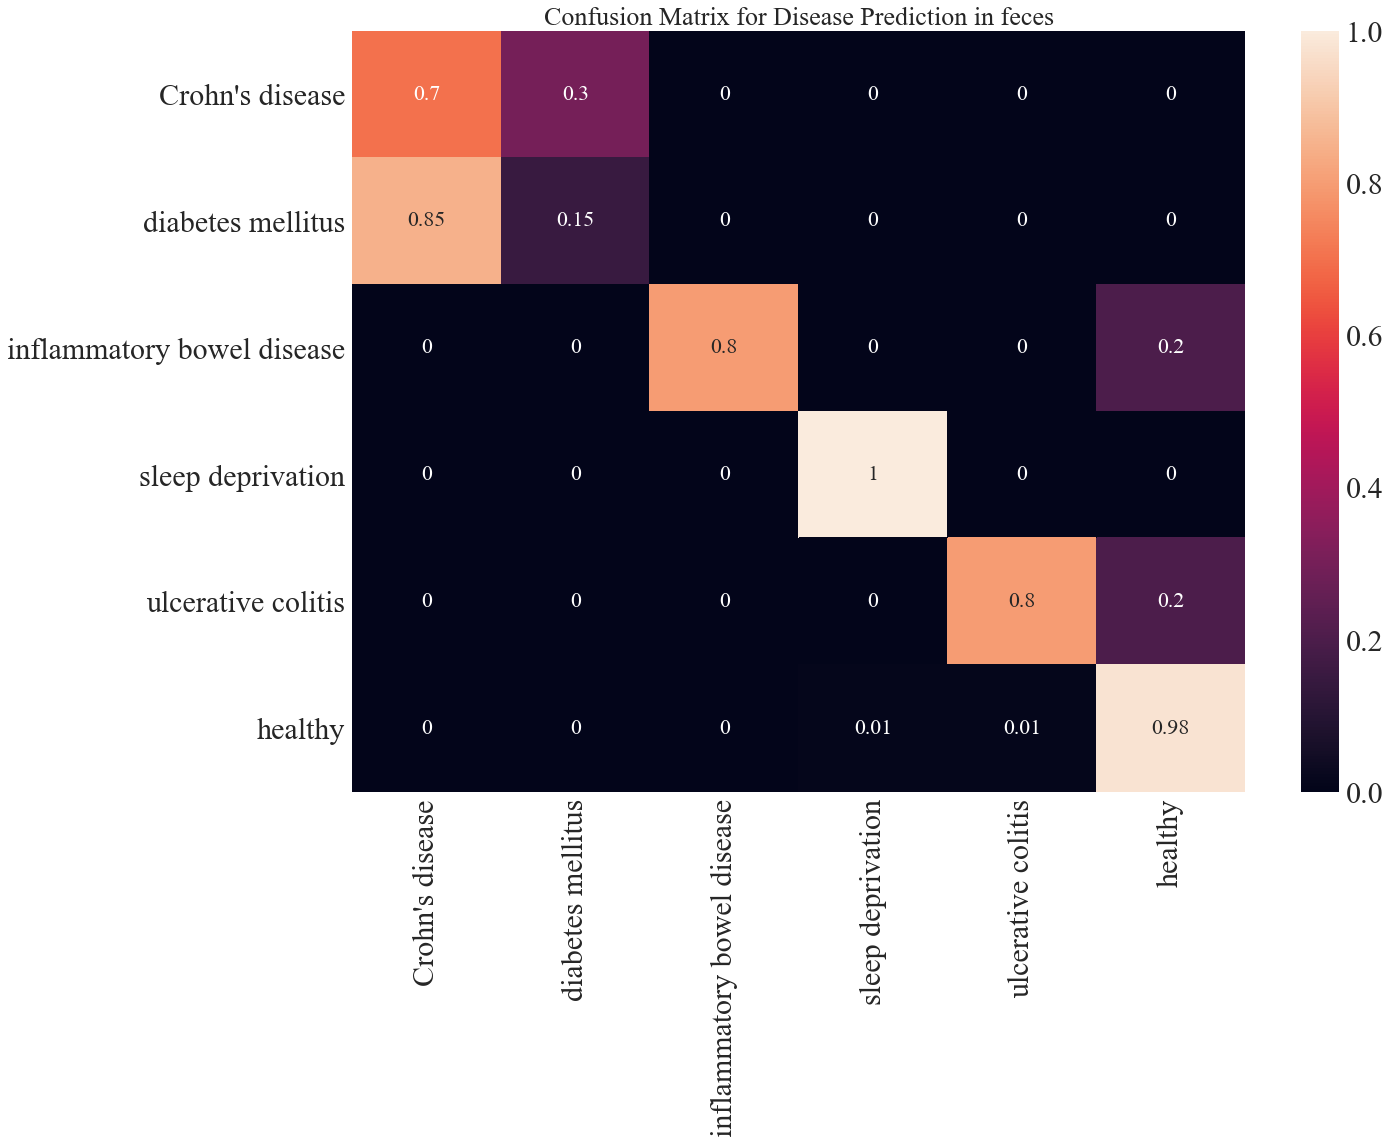

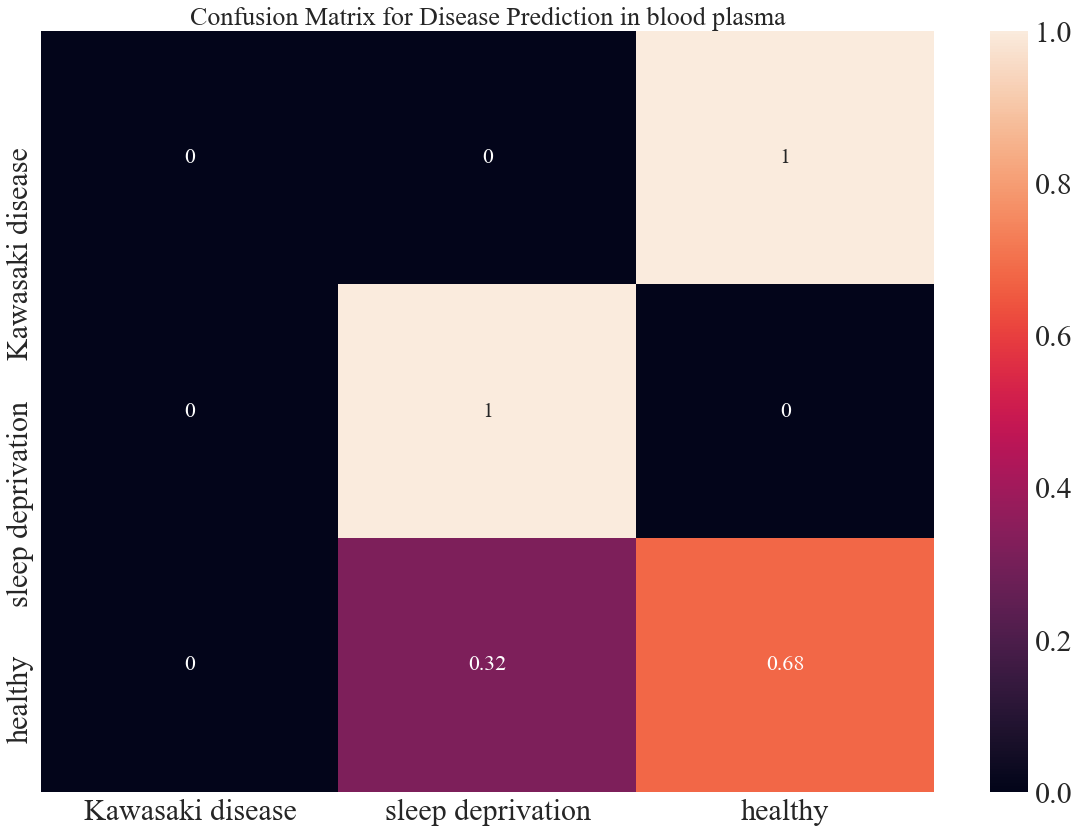

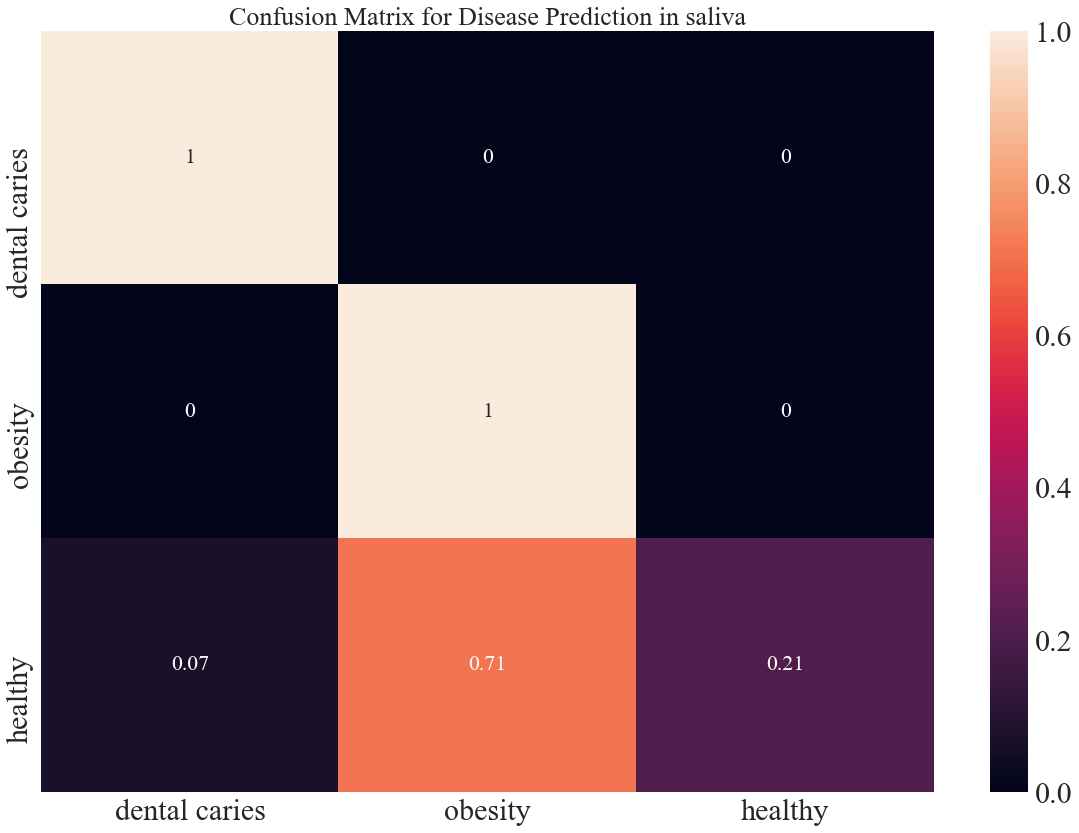

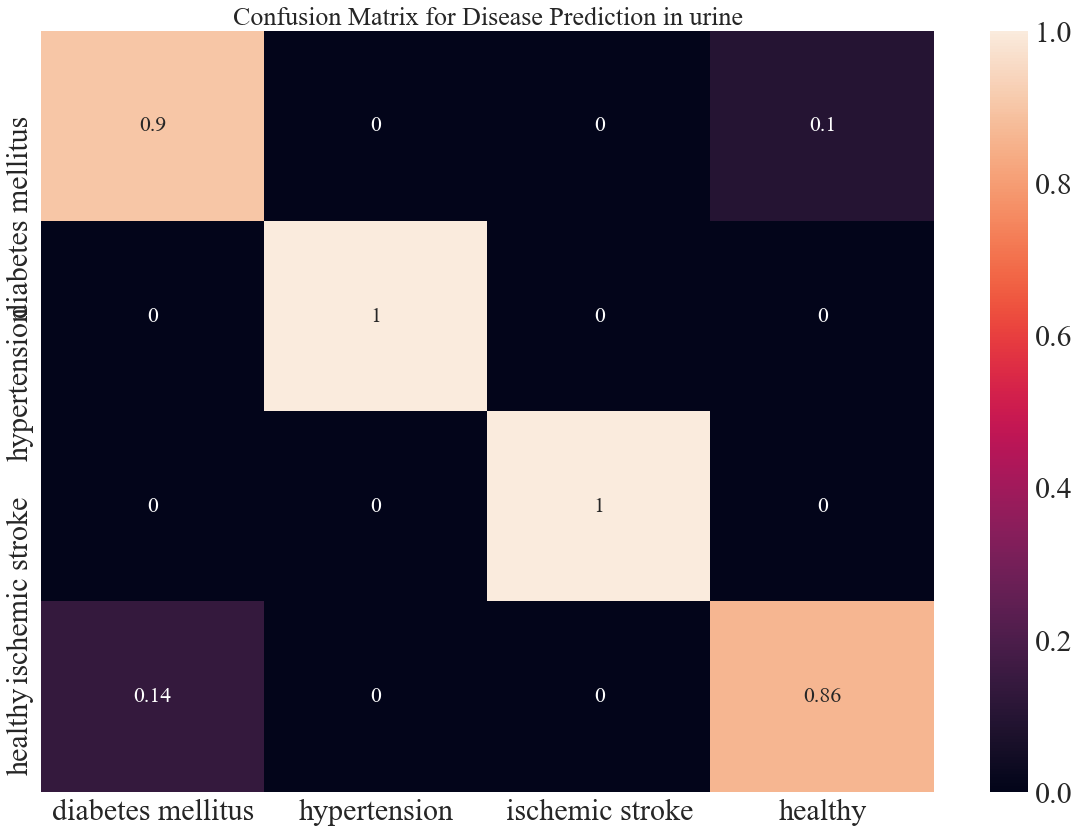

In [413]:
ts = 0
TestStore = np.zeros(101)
ter = np.zeros((1,4)).astype('O')
for k in locations: 
    index = np.where((MegaLabel[:,6] ==501) * (MegaLabel[:,8] == place[k]) )[0]
    #make not_applicable, not collected, not specified, no disease reported all healthy
    temp =  (MegaLabel[:,2]==6) + (MegaLabel[:,2]==10) + (MegaLabel[:,2]==11) +  (MegaLabel[:,2]==12) +  (MegaLabel[:,2]==13)
    MegaLabel[:,2] = MegaLabel[:,2] * (~temp) +  temp *100
    total = index.shape[0]
    begin = int(total * .75)
    permute = np.random.permutation(total)
    t = np.sum(MegaLabel[index,2] != 100)
    if(t>4):
        ts = ts + .25 * index.shape[0]
        subRecording = []
        Ftemp = Features[index,:]
        LabelTemp = MegaLabel[index,2]
        data.append(Ftemp)
        labels.append(LabelTemp)
        clf = LogisticRegression(random_state=0, penalty = 'l1', C = .1,class_weight = "balanced").fit(Features[index[permute[0:begin]],:], MegaLabel[index[permute[0:begin]],2])
        ft = len(index[permute[0:begin]])
        ftemp = np.zeros((ft,4)).astype('O')
        ftemp[:,0] = np.sort(UniqueList[11])[MegaLabel[index[permute[0:begin]],11].astype('int')]
        ftemp[:,1] = "Training"
        ftemp[:,2] = A[clf.predict(Features[index[permute[0:begin]],:]).astype('int')]
        ftemp[:,3] = A[MegaLabel[index[permute[0:begin]],2].astype('int')]
        ter = np.vstack((ter,ftemp))
        ft = len(index[permute[begin:]])
        ftemp = np.zeros((ft,4)).astype('O')
        ftemp[:,0] = np.sort(UniqueList[11])[MegaLabel[index[permute[begin:]],11].astype('int')]
        ftemp[:,1] = "Test"
        ftemp[:,2] = A[clf.predict(Features[index[permute[begin:]],:]).astype('int')]
        ftemp[:,3] = A[MegaLabel[index[permute[begin:]],2].astype('int')]
        ter = np.vstack((ter,ftemp))
        y_pred = clf.predict(Features[index[permute[begin:]],:])
        confusionMatrix = confusion_matrix(MegaLabel[index[permute[begin:]],2], y_pred)
        temp = np.ix_(np.unique(MegaLabel[index[permute[begin:]],2]).astype("int"),np.unique(MegaLabel[index[permute[begin:]],2]).astype("int"))
        ConfusionMatrixTotal[temp] = ConfusionMatrixTotal[temp] + confusionMatrix
        subRecording.append(index)
        subRecording.append(np.unique(MegaLabel[index[permute[begin:]],2]).astype("int"))
        subRecording.append(confusionMatrix)
        Recording.append(subRecording)
        print(place[k])
        print(confusionMatrix)
        import pandas as pd
        import seaborn as sn
        import matplotlib.pyplot as plt
        if(np.sort(UniqueList[8])[place[k]] == "feces"):
            r = np.eye(6)
            r[1,1] = 0;
            r[4,1] = 1;
            r[1,4] = 1;
            r[4,4] = 0;
            confusionMatrix = np.dot(confusionMatrix,r)
            confusionMatrix = np.dot(r,confusionMatrix)
            print(r)
        NCM = confusionMatrix * 1.0
        for z in range(0,NCM.shape[0]):
            NCM[z,:] = np.round(confusionMatrix[z,:]*1.0/np.sum(confusionMatrix[z,:]),decimals = 2)
        LabelsForGraph = np.array(Lebels)[np.unique(MegaLabel[index[permute[begin:]],2]).astype('int')].tolist()
        TestStore[np.unique(MegaLabel[index[permute[begin:]],2]).astype('int')] = 1
        df_cm = pd.DataFrame(NCM, index = LabelsForGraph, columns= LabelsForGraph)
        plt.figure(figsize = (20,14))
        plt.title("Confusion Matrix for Disease Prediction in " + np.sort(UniqueList[8])[place[k]] , fontsize = 26)
        svm =sn.heatmap(df_cm, annot=True)
        figure = svm.get_figure()    
        figure.savefig(np.sort(UniqueList[8])[place[k]] +".eps", format = "eps",dpi=100)
        print(np.sort(UniqueList[8])[place[k]])
        

    

In [414]:
newIndex = np.where(TestStore ==1)[0]

In [415]:
index = np.where((MegaLabel[:,6] ==501) * (MegaLabel[:,8] != 1234) )[0]
temp = np.ix_(newIndex,newIndex)
#temp = np.ix_(np.unique(MegaLabel[index,2]).astype('int'),np.unique(MegaLabel[index,2]).astype('int'))
confusionReal = ConfusionMatrixTotal[temp]

In [416]:
confusionMatrix = confusionReal
NCM = confusionMatrix * 1.0
for k in range(0,confusionReal.shape[0]):
    NCM[k,:] = np.round(confusionMatrix[k,:]*1.0/np.sum(confusionMatrix[k,:]),decimals = 2)

In [417]:
index = np.where((MegaLabel[:,6] ==501) * (MegaLabel[:,8] != 1234) )[0]
np.unique(MegaLabel[index,2]).astype('int')
LabelsForGraph = np.array(Lebels)[newIndex].tolist()

In [418]:
NCM = NCM[np.ix_(range(0,1) + range(2,11), range(0,1) + range(2,11))]

In [419]:
LabelsForGraph = LabelsForGraph[0:1] + LabelsForGraph[2:]

In [420]:
LabelsForGraph

["Crohn's disease",
 'dental caries',
 'diabetes mellitus',
 'hypertension',
 'inflammatory bowel disease',
 'ischemic stroke',
 'obesity',
 'sleep deprivation',
 'ulcerative colitis',
 'healthy']

In [421]:
from copy import copy, deepcopy

In [422]:
LabelsForGraphTemp = deepcopy(LabelsForGraph);  

In [423]:
LabelsForGraphTemp[1] = LabelsForGraph[8];

In [424]:
LabelsForGraphTemp[8] = LabelsForGraph[1];

In [425]:
LabelsForGraph = LabelsForGraphTemp

In [426]:
Identity = np.eye(10)

In [427]:
Identity[1,1] = 0; Identity[1,8] = 1 ; Identity[8,8] = 0; Identity[8,1] = 1;

In [428]:
NCM = np.matmul(Identity, np.matmul(NCM , Identity))

In [429]:
csfont = {'fontname':'Times New Roman'}

In [430]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

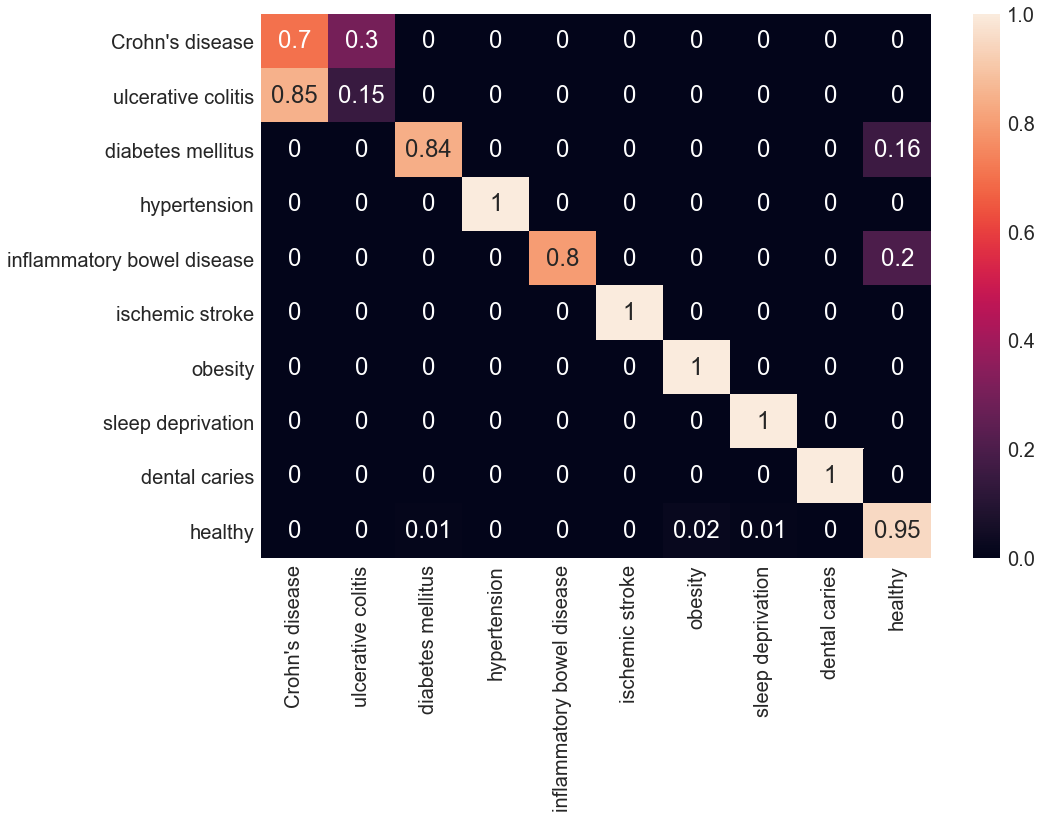

In [431]:

df_cm = pd.DataFrame(NCM, index = LabelsForGraph, columns= LabelsForGraph)
plt.figure(figsize = (15,10))
#plt.title("Confusion Matrix For Disease Prediction", fontsize = 26,**csfont)
sn.set(font_scale=2.0) 
#annot_kws={'fontsize':10, 
#           'fontstyle':'normal',  
#           'color':"k",
#           'alpha':0.6, 
#           'rotation':"vertical",
#           'verticalalignment':'center',
#           'backgroundcolor':'w'}
svm = sn.heatmap(df_cm, annot=True)#,annot_kws= annot_kws)
figure = svm.get_figure()    
figure.savefig("DiseasePrediction.eps" , format='eps', dpi=1000,bbox_inches = "tight")

In [432]:
#ter = ter[1:,:]

In [433]:
#cf = np.zeros((5190,4)).astype('O')

In [434]:
#ter.shape

(5190, 4)

In [437]:
#temp = np.where(ter[:,1] == "Test")[0]

In [438]:
#cf[0:1299,:] = ter[temp,:]

In [441]:
#tmep = np.where(ter[:,1] == "Training")[0]

In [443]:
#cf[1299:,:] = ter[tmep,:]

In [309]:
#2598 + 2593

5191

In [306]:
#np.unique(ter[:,1])

array(['Test', 'Training'], dtype=object)

In [444]:
#B = np.chararray(5191,4)
#B = cf
#fields = ["File Name", "Training or Test", "Predicted Value", "True Value" ]
#filename = "DiseasePredictions.csv"


In [445]:
#import csv  
#with open(filename, 'w') as csvfile:  
    # creating a csv writer object  
#    csvwriter = csv.writer(csvfile)  
        
    # writing the fields  
#    csvwriter.writerow(fields)  
        
    # writing the data rows  
#    csvwriter.writerows(B) 

In [227]:
#A = np.zeros((101)).astype('O')
#A[0:19] = np.sort(UniqueList[2])
#A[100] = 'healthy'

In [228]:
#A

array(['Chagas disease', "Crohn's disease", 'Kawasaki disease',
       'circadian rhythm disorders', 'dental caries', 'diabetes mellitus',
       'disease NOS', 'hypertension', 'inflammatory bowel disease',
       'ischemic stroke', 'no disease reported', 'not applicable',
       'not collected', 'not specified', 'obesity',
       'primary bacterial infectious disease', 'psoriasis',
       'sleep deprivation', 'ulcerative colitis', 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 'healthy'],
      dtype=object)

In [204]:
#MegaLabel.shape

(19497, 11)